In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('stress.csv')

In [8]:
df

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.800000,1521614353,5,1.806818,...,1.0000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.000000,1527009817,4,9.429737,...,1.1250,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.800000,1535935605,2,7.769821,...,1.0000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.600000,1516429555,0,2.667798,...,1.0000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.800000,1539809005,24,7.554238,...,1.0000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [10]:
df.isnull().sum().tail(60)

lex_liwc_differ             0
lex_liwc_percept            0
lex_liwc_see                0
lex_liwc_hear               0
lex_liwc_feel               0
lex_liwc_bio                0
lex_liwc_body               0
lex_liwc_health             0
lex_liwc_sexual             0
lex_liwc_ingest             0
lex_liwc_drives             0
lex_liwc_affiliation        0
lex_liwc_achieve            0
lex_liwc_power              0
lex_liwc_reward             0
lex_liwc_risk               0
lex_liwc_focuspast          0
lex_liwc_focuspresent       0
lex_liwc_focusfuture        0
lex_liwc_relativ            0
lex_liwc_motion             0
lex_liwc_space              0
lex_liwc_time               0
lex_liwc_work               0
lex_liwc_leisure            0
lex_liwc_home               0
lex_liwc_money              0
lex_liwc_relig              0
lex_liwc_death              0
lex_liwc_informal           0
lex_liwc_swear              0
lex_liwc_netspeak           0
lex_liwc_assent             0
lex_liwc_n

In [11]:
df['label'].value_counts()

1    1488
0    1350
Name: label, dtype: int64

In [12]:
df['text_len'] = df['text'].apply(len)

<AxesSubplot:xlabel='text_len', ylabel='Density'>

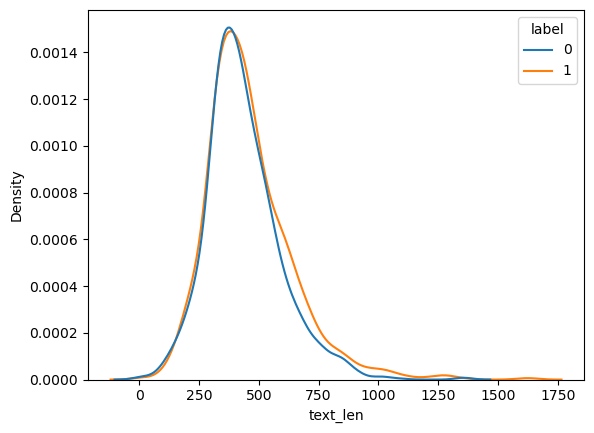

In [13]:
sns.kdeplot(df['text_len'],hue=df['label'])

In [14]:
df['subreddit'].value_counts()

ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: subreddit, dtype: int64

In [15]:
df.select_dtypes(include='object').columns

Index(['subreddit', 'post_id', 'sentence_range', 'text'], dtype='object')

C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ptsd'),
  Text(1, 0, 'assistance'),
  Text(2, 0, 'relationships'),
  Text(3, 0, 'survivorsofabuse'),
  Text(4, 0, 'domesticviolence'),
  Text(5, 0, 'anxiety'),
  Text(6, 0, 'homeless'),
  Text(7, 0, 'stress'),
  Text(8, 0, 'almosthomeless'),
  Text(9, 0, 'food_pantry')])

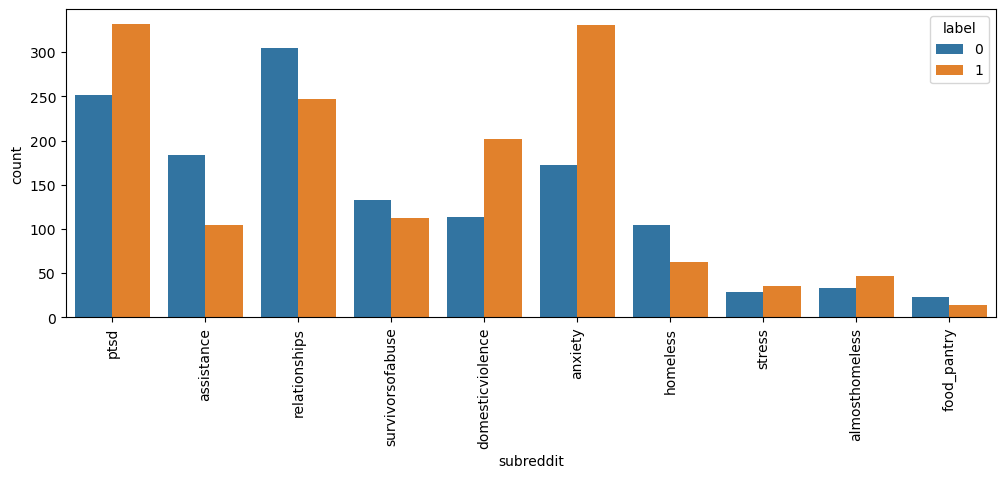

In [16]:
plt.figure(figsize=(12,4))
ax = sns.countplot(df['subreddit'],hue=df['label'])
plt.xticks(rotation =90)

<AxesSubplot:ylabel='text_len'>

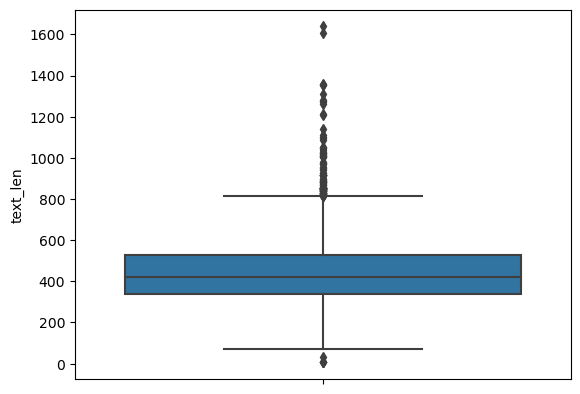

In [17]:
sns.boxplot(y=df['text_len'])

In [18]:
df['text_len'].describe((0.01,0.15,0.25,0.5,0.75,0.9,0.99))

count    2838.000000
mean      447.996476
std       168.929122
min         6.000000
1%        136.370000
15%       306.000000
25%       339.000000
50%       421.000000
75%       528.750000
90%       660.300000
99%      1004.520000
max      1639.000000
Name: text_len, dtype: float64

In [19]:
q3 = df['text_len'].quantile(0.75)
q1 = df['text_len'].quantile(0.25)
iqr = q3-q1
low_fence = q1-1.5*iqr
upper_fence = q3+1.5*iqr


df = df[(df['text_len']>=low_fence) & (df['text_len']<=upper_fence)]

<AxesSubplot:ylabel='text_len'>

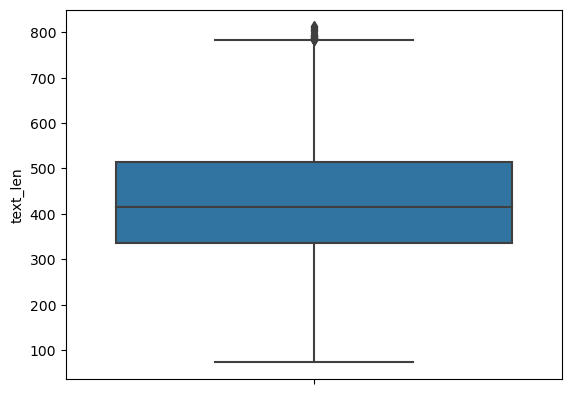

In [20]:
sns.boxplot(y=df['text_len'])

In [21]:
df['text'][4]

'October is Domestic Violence Awareness Month and I am a domestic violence survivor who is still struggling, even after over four years. Lately I have been feeling very angry. Angry that my abusive ex received no real consequences for his actions. This man abused me in all manners: physically, sexually, emotionally, verbally, financially, etc. I was granted a restraining order against him (and it was renewed a year later) but I was unable to press criminal charges against him because I didn’t have enough evidence to have a case.'

In [22]:
import demoji

In [23]:
# Remove emojis from the text
def remove_emoji(text):
    clean_text = demoji.replace(text, '')
    return clean_text


In [24]:
df['text'] = df['text'].apply(remove_emoji)

C:\Users\MAYUR\AppData\Local\Temp\ipykernel_19032\1264182032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(remove_emoji)


In [25]:
import re

In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string 


In [27]:
lemmatizer = WordNetLemmatizer()

In [28]:
from nltk.tokenize import sent_tokenize

In [29]:
stop_words = stopwords.words('english')

In [30]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]',' ',text).lower()
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    tokens = sent_tokenize(text)
    processed_text = ' '.join(lemmatizer.lemmatize(token.lower()) for token in tokens)
    return processed_text

In [31]:
# Apply the clean_text function to the 'Text' column
df['text'] = df['text'].apply(clean_text)

C:\Users\MAYUR\AppData\Local\Temp\ipykernel_19032\1157702716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(clean_text)


In [32]:
from wordcloud import WordCloud

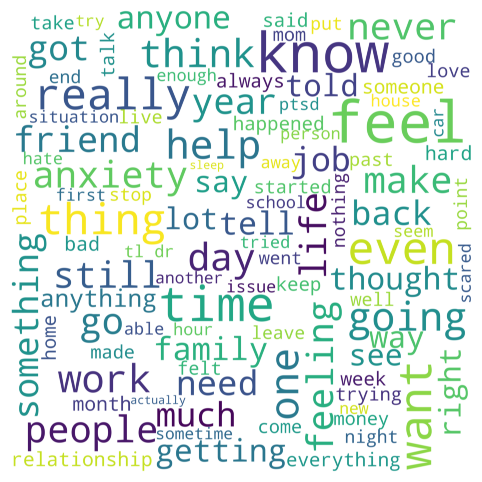

In [33]:
word_cloud_text = ''.join(df[df["label"]==1]['text'])

wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

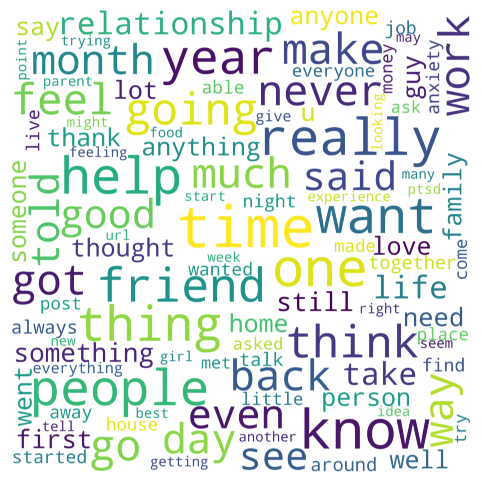

In [34]:
word_cloud_text = ''.join(df[df["label"]==0]['text'])

wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [35]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,text_len
0,ptsd,8601tu,"(15, 20)",said felt way suggeted go rest trigger ahead y...,33181,1,0.8,1521614353,5,1.806818,...,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742,571
1,assistance,8lbrx9,"(0, 5)",hey r assistance sure right place post goes cu...,2606,0,1.0,1527009817,4,9.429737,...,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857,588
4,survivorsofabuse,9p2gbc,"[0, 5]",october domestic violence awareness month dome...,1421,1,0.8,1539809005,24,7.554238,...,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167,533
5,relationships,7tx7et,"(30, 35)",think want put effort relationship work diffic...,17554,1,1.0,1517274027,2,3.531124,...,1.1818,1.0,1.70415,1.44396,1.82046,0.75,5,4.338429,-0.550000,539
6,domesticviolence,7iphly,"[25, 30]",big company luckily see time acted though exis...,165,0,0.8,1512854409,6,8.331463,...,1.1250,1.0,1.66985,1.57757,1.89926,0.88,29,8.394244,0.277381,588


In [73]:
X= df['text']
y= df['label']

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [76]:
from sklearn.naive_bayes import MultinomialNB

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
Vectorizer = TfidfVectorizer()

In [80]:
from sklearn.pipeline import Pipeline

In [81]:
from sklearn.naive_bayes import BernoulliNB

In [82]:
steps = [('tfidf', TfidfVectorizer()),
    ('model', RandomForestClassifier())]

In [83]:
pipeline = Pipeline(steps)

In [84]:
from sklearn import set_config

In [85]:
set_config(display='diagram')


In [86]:
pipeline

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', RandomForestClassifier())])

In [87]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', RandomForestClassifier())])

In [88]:
predictions = pipeline.predict(X_test)

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
print(confusion_matrix(predictions,y_test))
print(classification_report(predictions,y_test))

[[153  70]
 [ 95 229]]
              precision    recall  f1-score   support

           0       0.62      0.69      0.65       223
           1       0.77      0.71      0.74       324

    accuracy                           0.70       547
   macro avg       0.69      0.70      0.69       547
weighted avg       0.71      0.70      0.70       547



In [53]:
user_input = ['leave']

In [54]:
pipeline.predict(user_input)

array([1], dtype=int64)